# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis¶

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 13.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
378267,0.0073,0.0024,0.0024,0.0024,0.0024,0.1855,0.4639,0.1807,0.0024,0.1880,5,5,15,15
221623,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0537,0.1270,0.0024,0.1514,4,0,15,0
149523,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.7959,0.1831,0.0024,0.5029,8,0,6,0
272263,0.0439,0.0024,0.0024,0.0024,0.0024,0.0366,1.3452,0.3516,0.0024,1.3135,10,10,3,3
54749,0.0024,0.0024,0.0024,0.0024,0.0024,0.1489,0.4053,0.2026,0.0024,0.2173,0,0,0,0


In [3]:
raw_data.shape

(456617, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456617 entries, 0 to 456616
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          456617 non-null  float64
 1   Emg2          456617 non-null  float64
 2   Emg3          456617 non-null  float64
 3   Emg4          456617 non-null  float64
 4   Emg5          456617 non-null  float64
 5   Emg6          456617 non-null  float64
 6   Emg7          456617 non-null  float64
 7   Emg8          456617 non-null  float64
 8   Emg9          456617 non-null  float64
 9   Emg10         456617 non-null  float64
 10  repetition    456617 non-null  int64  
 11  rerepetition  456617 non-null  int64  
 12  stimulus      456617 non-null  int64  
 13  restimulus    456617 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 48.8 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,456617.000000,456617.00000,456617.000000,456617.000000,456617.000000,456617.000000,456617.000000,456617.000000,456617.000000,456617.000000,456617.000000,456617.000000,456617.000000,456617.000000
mean,0.087577,0.11154,0.061346,0.020098,0.008846,0.090938,0.618475,0.313635,0.056314,0.273335,3.228675,2.073085,5.721548,3.711012
std,0.175377,0.27810,0.259189,0.122684,0.026813,0.155394,0.947964,0.324967,0.237637,0.115594,3.489333,3.210448,6.595727,6.071876
min,0.000000,0.00000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.00240,0.002400,0.002400,0.002400,0.002400,0.065900,0.131800,0.002400,0.212400,0.000000,0.000000,0.000000,0.000000
50%,0.024400,0.00240,0.002400,0.002400,0.002400,0.031700,0.156300,0.200200,0.002400,0.251500,2.000000,0.000000,3.000000,0.000000
75%,0.095200,0.00980,0.004900,0.002400,0.002400,0.122100,0.798300,0.373500,0.002400,0.297900,6.000000,4.000000,10.000000,6.000000
max,4.668000,4.66550,4.663100,4.521500,1.843300,3.176300,4.668000,4.668000,4.665500,3.840300,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     188571
8      15509
4      15506
12     15496
7      15495
2      15486
5      15477
11     15468
6      15464
9      15445
10     15440
3      15435
1      15424
13     10332
14     10327
17     10323
15     10294
16     10251
18      5162
19      5162
21      5161
22      5135
23      5128
20      5126
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

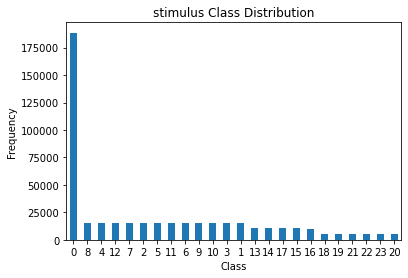

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
64024,0.0098,0.0024,0.0024,0.0024,0.0024,0.1001,0.3809,0.1270,0.0024,0.2515,0,0,0,0
117958,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0586,0.0952,0.0024,0.4663,0,0,0,0
333377,0.0244,0.0024,0.0024,0.0024,0.0024,0.0024,0.0977,0.1489,0.0024,0.2246,0,0,0,0
291783,0.0122,0.0024,0.0024,0.0024,0.0024,0.0024,0.0732,0.1758,0.0024,0.2173,0,0,0,0
44846,0.2002,1.3110,0.2100,0.0244,0.0146,0.3540,4.6484,0.5884,0.2515,0.3003,4,4,6,6


In [12]:
raw_data.shape

(354555, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354555 entries, 0 to 456616
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          354555 non-null  float64
 1   Emg2          354555 non-null  float64
 2   Emg3          354555 non-null  float64
 3   Emg4          354555 non-null  float64
 4   Emg5          354555 non-null  float64
 5   Emg6          354555 non-null  float64
 6   Emg7          354555 non-null  float64
 7   Emg8          354555 non-null  float64
 8   Emg9          354555 non-null  float64
 9   Emg10         354555 non-null  float64
 10  repetition    354555 non-null  int64  
 11  rerepetition  354555 non-null  int64  
 12  stimulus      354555 non-null  int64  
 13  restimulus    354555 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 48.6 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [16]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

# Decision Tree

In [17]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred1 = tree.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 84.70195033210645


Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     37418
           1       0.81      0.81      0.81      1916
           2       0.79      0.82      0.80      1886
           3       0.79      0.77      0.78      2108
           4       0.76      0.77      0.77      1874
           5       0.75      0.75      0.75      1961
           6       0.78      0.79      0.79      2156
           7       0.75      0.74      0.75      1759
           8       0.72      0.76      0.74      1869
           9       0.67      0.67      0.67      1913
          10       0.73      0.72      0.72      1640
          11       0.76      0.74      0.75      1823
          12       0.78      0.77      0.77      1741
          13       0.79      0.78      0.78      1065
          14       0.61      0.64      0.62      1401
          15       0.67      0.66      0.67      1412
          16       0.71      0.72      0.71      1256
 

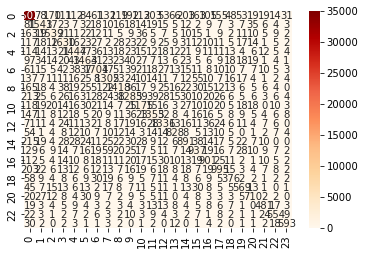

In [20]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 1.244517775803472
MSE: 14.632454767243447
RMSE: 3.825239177782671


In [22]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.8475103329355861
Recall Score :  0.8470195033210645
f1_score :  0.8472213736094031


# KNeighborsClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 86.17421838642805


Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     37418
           1       0.81      0.80      0.81      1916
           2       0.82      0.77      0.79      1886
           3       0.78      0.76      0.77      2108
           4       0.78      0.77      0.77      1874
           5       0.76      0.74      0.75      1961
           6       0.79      0.77      0.78      2156
           7       0.80      0.74      0.77      1759
           8       0.79      0.72      0.75      1869
           9       0.77      0.66      0.71      1913
          10       0.80      0.73      0.76      1640
          11       0.85      0.76      0.80      1823
          12       0.83      0.78      0.80      1741
          13       0.89      0.79      0.84      1065
          14       0.65      0.59      0.62      1401
          15       0.69      0.63      0.66      1412
          16       0.83      0.70      0.76      1256
 

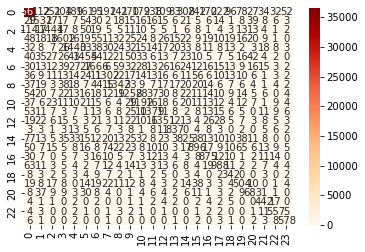

In [26]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 1.1222518368095218
MSE: 13.218738982668416
RMSE: 3.6357583779272815


In [28]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.8577964889734974
Recall Score :  0.8617421838642806
f1_score :  0.8580630094973742


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 92.09572562789975


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     37418
           1       0.95      0.90      0.92      1916
           2       0.95      0.86      0.90      1886
           3       0.91      0.87      0.89      2108
           4       0.93      0.86      0.89      1874
           5       0.90      0.86      0.88      1961
           6       0.94      0.90      0.92      2156
           7       0.91      0.82      0.86      1759
           8       0.92      0.84      0.88      1869
           9       0.88      0.80      0.84      1913
          10       0.90      0.82      0.86      1640
          11       0.95      0.82      0.88      1823
          12       0.93      0.87      0.90      1741
          13       0.95      0.86      0.90      1065
          14       0.77      0.71      0.74      1401
          15       0.82      0.80      0.81      1412
          16       0.92      0.80      0.86      1256
 

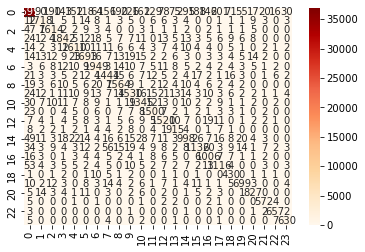

In [32]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.6831521202634288
MSE: 8.279998871825246
RMSE: 2.8774987179537104


In [34]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.9205756050303383
Recall Score :  0.9209572562789976
f1_score :  0.9194532317191998


# XGBoost

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

C:\Users\nafem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:54:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [36]:
y_pred4 = xgb.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 86.65651309387825


Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     37418
           1       0.88      0.79      0.83      1916
           2       0.88      0.79      0.83      1886
           3       0.82      0.79      0.80      2108
           4       0.83      0.75      0.79      1874
           5       0.79      0.75      0.77      1961
           6       0.82      0.78      0.80      2156
           7       0.83      0.75      0.79      1759
           8       0.82      0.74      0.78      1869
           9       0.69      0.63      0.66      1913
          10       0.77      0.69      0.73      1640
          11       0.86      0.74      0.80      1823
          12       0.84      0.77      0.80      1741
          13       0.87      0.77      0.82      1065
          14       0.65      0.63      0.64      1401
          15       0.69      0.70      0.69      1412
          16       0.82      0.68      0.75      1256
 

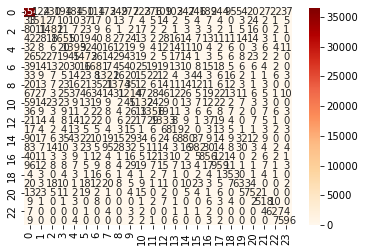

In [38]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 1.0847259240456346
MSE: 12.71623584493238
RMSE: 3.5659831526428136


In [40]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.8633699483484242
Recall Score :  0.8665651309387824
f1_score :  0.8633200838484351


# ExtraTreesClassifier

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)

ExtraTreesClassifier()

In [42]:
y_pred5 = extratree.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 92.26918249636869


Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     37418
           1       0.96      0.90      0.93      1916
           2       0.94      0.87      0.90      1886
           3       0.92      0.87      0.89      2108
           4       0.94      0.87      0.90      1874
           5       0.91      0.86      0.89      1961
           6       0.95      0.91      0.93      2156
           7       0.91      0.82      0.86      1759
           8       0.92      0.84      0.88      1869
           9       0.89      0.80      0.84      1913
          10       0.92      0.83      0.87      1640
          11       0.95      0.83      0.88      1823
          12       0.95      0.89      0.92      1741
          13       0.95      0.88      0.91      1065
          14       0.78      0.70      0.74      1401
          15       0.83      0.79      0.81      1412
          16       0.93      0.81      0.87      1256
 

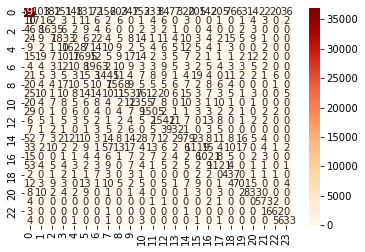

In [44]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [45]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.6821226608001579
MSE: 8.353457150512615
RMSE: 2.890234791589191


In [46]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.9225305881473725
Recall Score :  0.9226918249636868
f1_score :  0.9212013808115829
